<a href="https://colab.research.google.com/github/Marvel280904/All-Python-Project/blob/main/DecisionSupportSystem_Tugas_4_Marvel_0706022210039.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def activation(net, theta):
    return 1 if net >= theta else 0

def activation_bipolar(net, theta):
    return 1 if net >= theta else -1

def perceptron_train(inputs, targets, alpha, theta, bipolar=False):
    num_features = inputs.shape[1]
    weights = np.zeros(num_features)

    epoch = 0
    while True:
        error_count = 0
        for x, target in zip(inputs, targets):
            net = np.dot(x, weights)
            output = activation_bipolar(net, theta) if bipolar else activation(net, theta)
            error = target - output
            if error != 0:
                weights += alpha * error * x
                error_count += 1
        epoch += 1
        if error_count == 0 or epoch > 100:
            break
    return weights, epoch

# Fungsi OR - Binary
inputs_bin = np.array([
    [0, 0, 1],  # bias = 1
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
targets_bin = np.array([0, 1, 1, 1])

# Fungsi OR - Bipolar
inputs_bip = np.array([
    [-1, -1, 1],
    [-1, 1, 1],
    [1, -1, 1],
    [1, 1, 1]
])
targets_bip = np.array([-1, 1, 1, 1])

alpha = 1
theta = 0.2

weights_bin, ep_bin = perceptron_train(inputs_bin, targets_bin, alpha, theta)
weights_bip, ep_bip = perceptron_train(inputs_bip, targets_bip, alpha, theta, bipolar=True)

print("Binary weights:", weights_bin, "Epochs:", ep_bin)
print("Bipolar weights:", weights_bip, "Epochs:", ep_bip)

Binary weights: [1. 1. 0.] Epochs: 4
Bipolar weights: [2. 2. 2.] Epochs: 3


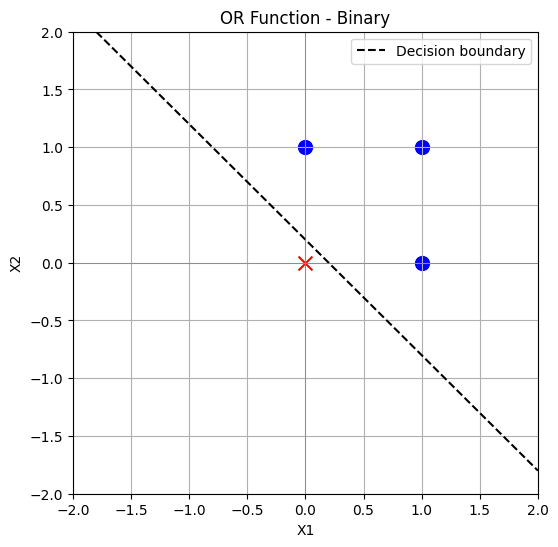

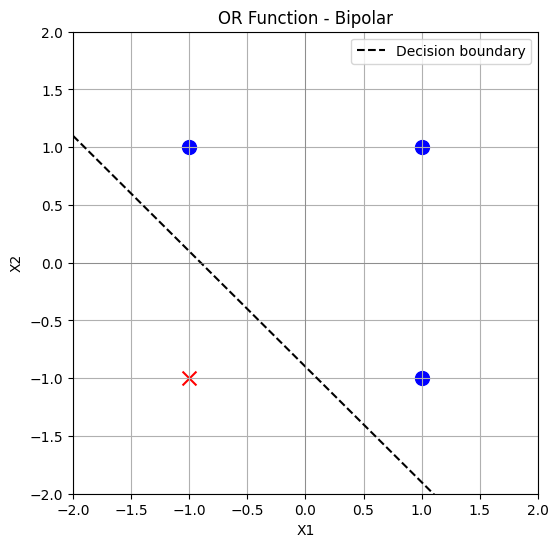

In [ ]:
import matplotlib.pyplot as plt

# Fungsi untuk visualisasi data + decision boundary
def plot_decision_boundary(inputs, targets, weights, theta, bipolar=False, title=""):
    # Ambil X1 dan X2 untuk plotting
    x_coords = inputs[:, 0]
    y_coords = inputs[:, 1]

    # Plot titik-titik data
    plt.figure(figsize=(6, 6))
    for x, y in zip(inputs, targets):
        color = 'blue' if y == 1 else 'red'
        marker = 'o' if y == 1 else 'x'
        plt.scatter(x[0], x[1], c=color, marker=marker, s=100)

    # Garis keputusan: w1*x1 + w2*x2 + b = theta
    # Artinya: w1*x + w2*y + w0 = theta → solve for y
    x_vals = np.linspace(-2, 2, 100)
    if weights[1] != 0:
        y_vals = (theta - weights[2] - weights[0]*x_vals) / weights[1]
        plt.plot(x_vals, y_vals, 'k--', label='Decision boundary')
    else:
        # Jika w2 = 0 → vertical line
        x_const = (theta - weights[2]) / weights[0]
        plt.axvline(x_const, color='k', linestyle='--', label='Decision boundary')

    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.show()

# Visualisasi untuk fungsi OR Binary
plot_decision_boundary(inputs_bin, targets_bin, weights_bin, theta, bipolar=False, title="OR Function - Binary")

# Visualisasi untuk fungsi OR Bipolar
plot_decision_boundary(inputs_bip, targets_bip, weights_bip, theta, bipolar=True, title="OR Function - Bipolar")


In [ ]:
import pandas as pd
import numpy as np

def encode_instance(row, bipolar=False):
    mapping = {
        "Outlook": {"Sunny": [1, 0, 0], "Overcast": [0, 1, 0], "Rain": [0, 0, 1]},
        "Temperature": {"Hot": [1, 0, 0], "Mild": [0, 1, 0], "Cool": [0, 0, 1]},
        "Humidity": {"High": [1, 0], "Normal": [0, 1]},
        "Wind": {"Strong": [1, 0], "Weak": [0, 1]},  # Perbaiki key mapping
        "PlayTennis": {"No": [1, 0], "Yes": [0, 1]}
    }

    try:
        inputs = mapping["Outlook"][row["Outlook"]] + \
                 mapping["Temperature"][row["Temperature"]] + \
                 mapping["Humidity"][row["Humidity"]] + \
                 mapping["Wind"][row["Wind"]]  # Pakai kolom 'Wind' yang benar
    except KeyError as e:
        print(f"KeyError saat encoding: {e}")
        print("Data baris:", row)
        raise

    target = mapping["PlayTennis"][row["PlayTennis"]]

    if bipolar:
        inputs = [1 if i == 1 else -1 for i in inputs]
        target = [1 if t == 1 else -1 for t in target]

    inputs.append(1)  # Bias
    return inputs, target

def train_perceptron_weather(X, Y, alpha, theta, bipolar=False, max_epochs=100):
    X = np.array(X)
    Y = np.array(Y)
    weights = np.zeros((2, X.shape[1]))

    for epoch in range(max_epochs):
        errors = 0
        for i in range(len(X)):
            net = np.dot(weights, X[i])
            output = []
            for val in net:
                if bipolar:
                    output.append(1 if val >= theta else -1)
                else:
                    output.append(1 if val >= theta else 0)
            output = np.array(output)
            error = Y[i] - output
            if not np.array_equal(error, np.zeros_like(error)):
                weights += alpha * error.reshape(2, 1) * X[i]
                errors += 1
        if errors == 0:
            break
    return weights, epoch + 1

# Membaca dan encode dataset
def run_weather_perceptron(file_path, alpha, theta, bipolar=False):
    df = pd.read_csv(file_path)
    X, Y = [], []
    for _, row in df.iterrows():
        xi, yi = encode_instance(row, bipolar=bipolar)
        X.append(xi)
        Y.append(yi)
    weights, epochs = train_perceptron_weather(X, Y, alpha, theta, bipolar)
    return weights, epochs

# Jalankan
file_path = "https://raw.githubusercontent.com/Marvel280904/Tugas-DSS-/refs/heads/main/weather.csv"
alpha = float(input("Masukkan nilai alpha: "))
theta = float(input("Masukkan nilai theta: "))

print("\n=== Binary Representation ===")
weights_bin, epoch_bin = run_weather_perceptron(file_path, alpha, theta, bipolar=False)
print("Bobot akhir (binary):\n", weights_bin)
print("Epoch selesai dalam:", epoch_bin)

print("\n=== Bipolar Representation ===")
weights_bip, epoch_bip = run_weather_perceptron(file_path, alpha, theta, bipolar=True)
print("Bobot akhir (bipolar):\n", weights_bip)
print("Epoch selesai dalam:", epoch_bip)


Masukkan nilai alpha: 0.5
Masukkan nilai theta: 0.2

=== Binary Representation ===
Bobot akhir (binary):
 [[ 2.  -3.   1.   0.5 -1.5  1.   2.5 -2.5  2.  -2.   0. ]
 [-1.5  2.5 -1.  -0.5  2.  -1.5 -2.   2.  -1.5  1.5  0. ]]
Epoch selesai dalam: 24

=== Bipolar Representation ===
Bobot akhir (bipolar):
 [[ 5. -5.  1.  1. -3.  3.  5. -5.  3. -3. -1.]
 [-6.  6. -2.  0.  2. -4. -6.  6. -4.  4.  2.]]
Epoch selesai dalam: 12


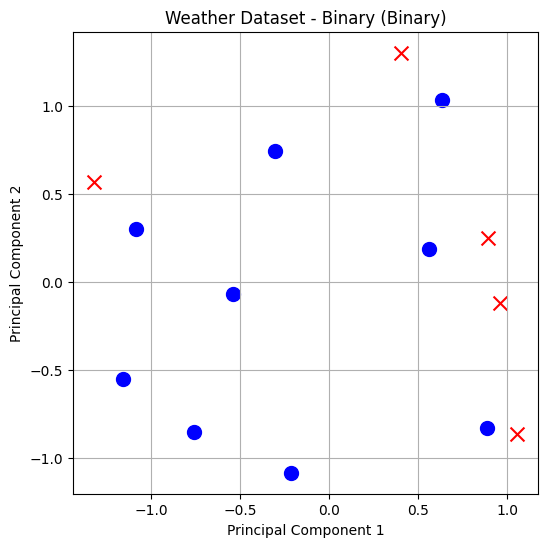

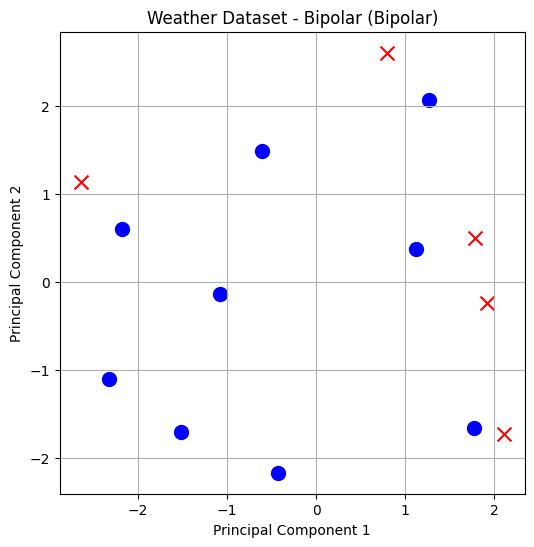

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def visualize_weather(X, Y, bipolar=False, title="Visualisasi PCA - Weather Dataset"):
    X = np.array(X)
    Y = np.array(Y)

    # Reduksi dimensi dari 10D ke 2D
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    # Ambil label target: index 1 adalah Yes (bisa disesuaikan)
    labels = np.argmax(Y, axis=1)

    # Visualisasi titik-titik
    plt.figure(figsize=(6, 6))
    for i in range(len(X_reduced)):
        color = 'blue' if labels[i] == 1 else 'red'
        marker = 'o' if labels[i] == 1 else 'x'
        plt.scatter(X_reduced[i][0], X_reduced[i][1], color=color, marker=marker, s=100)

    plt.title(title + (" (Bipolar)" if bipolar else " (Binary)"))
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(True)
    plt.show()

# Visualisasi Binary
df = pd.read_csv(file_path)
X_bin, Y_bin = [], []
for _, row in df.iterrows():
    xi, yi = encode_instance(row, bipolar=False)
    X_bin.append(xi)
    Y_bin.append(yi)
visualize_weather(X_bin, Y_bin, bipolar=False, title="Weather Dataset - Binary")

# Visualisasi Bipolar
X_bip, Y_bip = [], []
for _, row in df.iterrows():
    xi, yi = encode_instance(row, bipolar=True)
    X_bip.append(xi)
    Y_bip.append(yi)
visualize_weather(X_bip, Y_bip, bipolar=True, title="Weather Dataset - Bipolar")
